In [158]:

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# import numpy as np
from glob import glob
import cv2

In [159]:
imgs_dir="/home/luma/Documents/workspace/data/dermnet/dermnet_mini"
out_dir="/home/luma/Documents/workspace/data/dermnet/experiments/experiment1"
filenames_dir= os.path.join(out_dir, 'filenames')
model_dir= os.path.join(out_dir, 'model')
results_dir= os.path.join(out_dir, 'result')

os.makedirs(model_dir, exist_ok=True)
os.makedirs(filenames_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

In [160]:
# train_img = sorted(list(os.listdir(os.path.join(imgs_dir, 'train'))))

train_images = sorted(glob(os.path.join(imgs_dir, "*/*.jpg")))
print(len(train_images))
train_images[-5]

9430


'/home/luma/Documents/workspace/data/dermnet/dermnet_mini/WartsMolluscumandotherViralInfections/warts-plantar-97.jpg'

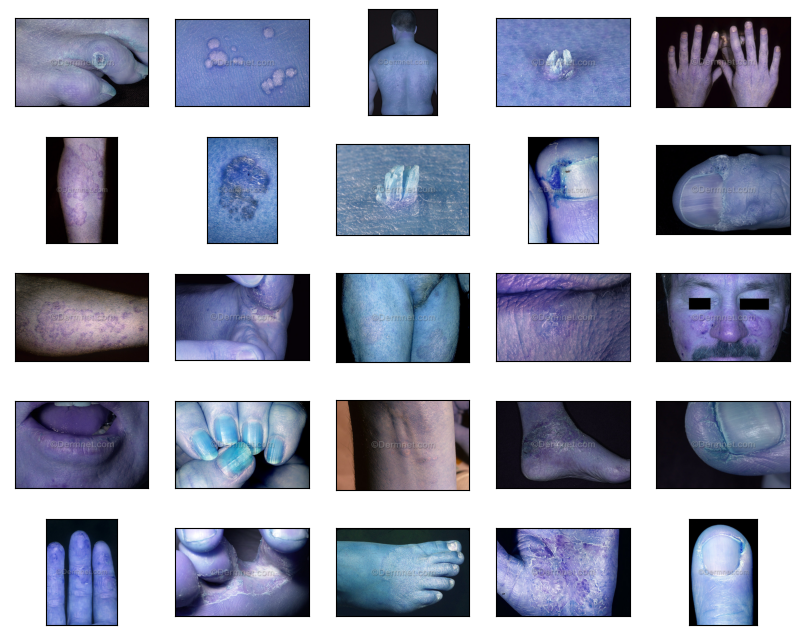

In [161]:
import random
example_list = [image for image in random.sample(train_images, k=25)]
example_list

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    image = cv2.imread(example_list[i])
    plt.imshow(image)
plt.show()

In [162]:
train_data=[]
train_labels=[]
for imagePath in train_images:
    label = os.path.basename(os.path.dirname(imagePath))
    train_labels.append(label)
print(list(set(train_labels)))
print(len(list(set(train_labels))))

['ActinicKeratosisBasalCellCarcinomaandotherMalignantLesions', 'SeborrheicKeratosesandotherBenignTumors', 'AcneandRosaceaPhotos', 'PsoriasispicturesLichenPlanusandrelateddiseases', 'NailFungusandotherNailDisease', 'TineaRingwormCandidiasisandotherFungalInfections', 'WartsMolluscumandotherViralInfections', 'EczemaPhotos']
8


In [163]:
import pandas as pd
df_data = pd.DataFrame({'filename': train_images, 'label': train_labels})
df_data.to_csv(os.path.join(filenames_dir,'full_dataset.csv'), index=False)
df_data

,filename,label
0,/home/luma/Documents/workspace/data/dermnet/de...,AcneandRosaceaPhotos
1,/home/luma/Documents/workspace/data/dermnet/de...,AcneandRosaceaPhotos
2,/home/luma/Documents/workspace/data/dermnet/de...,AcneandRosaceaPhotos
3,/home/luma/Documents/workspace/data/dermnet/de...,AcneandRosaceaPhotos
4,/home/luma/Documents/workspace/data/dermnet/de...,AcneandRosaceaPhotos
...,...,...
9425,/home/luma/Documents/workspace/data/dermnet/de...,WartsMolluscumandotherViralInfections
9426,/home/luma/Documents/workspace/data/dermnet/de...,WartsMolluscumandotherViralInfections
9427,/home/luma/Documents/workspace/data/dermnet/de...,WartsMolluscumandotherViralInfections
9428,/home/luma/Documents/workspace/data/dermnet/de...,WartsMolluscumandotherViralInfections


In [164]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data['filename'], df_data['label'], shuffle=True, test_size=0.20, random_state=42)

print("train: ", len(X_train))
print("test: ", len(X_test))

df_train = pd.DataFrame({'filename': X_train, 'label': y_train})
df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)

df_test = pd.DataFrame({'filename': X_test, 'label': y_test})
df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)

train:  7544
test:  1886


Carrega dataset com Gerador

In [165]:

# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
 
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    # shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    horizontal_flip=True
    validation_split=0.25
    )
 

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col="filename",
    y_col="label",
    subset="training",
    shuffle=True,
    class_mode="sparse",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    )

validation_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col="filename",
    y_col="label",
    subset="validation",
    shuffle=True,
    class_mode="sparse",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator=test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="filename",
    y_col="label",
    seed=42,
    shuffle=False,
    class_mode="sparse",
    # class_mode=None,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    )

Found 5658 validated image filenames belonging to 8 classes.
Found 1886 validated image filenames belonging to 8 classes.
Found 1886 validated image filenames belonging to 8 classes.


(16, 224, 224, 3)


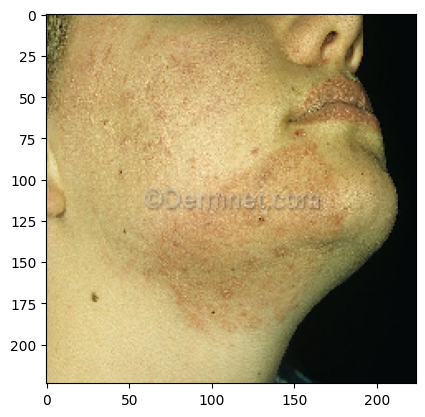

In [166]:
for _ in range(1):
    img, label = validation_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [ ]:
Arquitetura do modelo

In [167]:
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_20 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 activation_21 (Activation)  (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                 

In [168]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    # steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    # validation_data=validation_generator,
    # validation_steps=nb_validation_samples // batch_size
    )

Epoch 1/100
354/354 [==============================] - 30s 83ms/step - loss: 2.0201 - accuracy: 0.2033 - val_loss: 1.9089 - val_accuracy: 0.2428
Epoch 2/100
354/354 [==============================] - 29s 83ms/step - loss: 1.8470 - accuracy: 0.2893 - val_loss: 1.8147 - val_accuracy: 0.3017
Epoch 3/100
354/354 [==============================] - 29s 81ms/step - loss: 1.7236 - accuracy: 0.3538 - val_loss: 1.8021 - val_accuracy: 0.3059
Epoch 4/100
354/354 [==============================] - 28s 78ms/step - loss: 1.5808 - accuracy: 0.4125 - val_loss: 1.8301 - val_accuracy: 0.3118
Epoch 5/100
354/354 [==============================] - 28s 78ms/step - loss: 1.4088 - accuracy: 0.4737 - val_loss: 1.8829 - val_accuracy: 0.3420
Epoch 6/100
354/354 [==============================] - 27s 77ms/step - loss: 1.2140 - accuracy: 0.5507 - val_loss: 2.0555 - val_accuracy: 0.3324
Epoch 7/100
354/354 [==============================] - 28s 79ms/step - loss: 1.0131 - accuracy: 0.6271 - val_loss: 2.3011 - val_ac

In [169]:
model.save(model_dir)

INFO:tensorflow:Assets written to: /home/luma/Documents/workspace/data/dermnet/experiments/experiment1/model/assets


INFO:tensorflow:Assets written to: /home/luma/Documents/workspace/data/dermnet/experiments/experiment1/model/assets


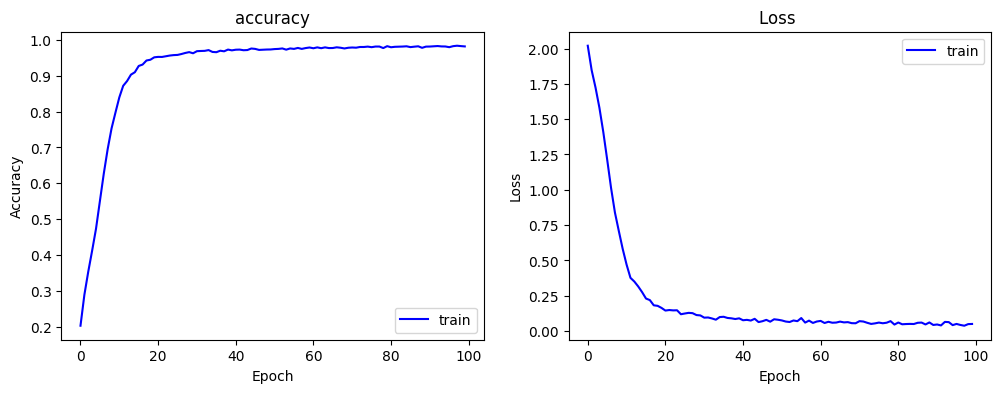

In [170]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

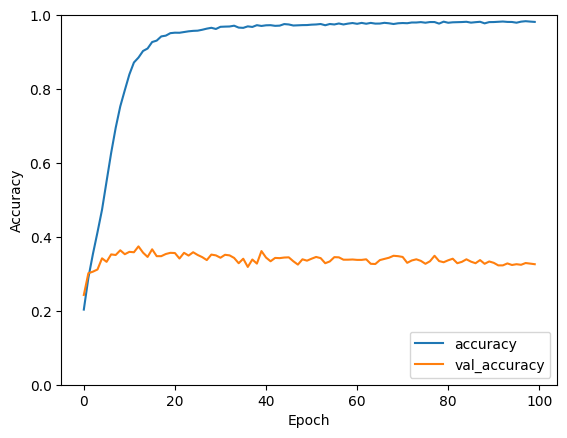

In [171]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [181]:
score = model.evaluate(test_generator, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print(f'Test loss: {score[0]}')

accuracy: 34.36%
Test loss: 8.213876724243164


In [173]:
# import keras
# model = keras.models.load_model(model_dir)


In [174]:
test_scores = model.predict(test_generator, verbose=0)

In [175]:
test_labels = validation_generator.classes
preds = np.argmax(test_scores, axis = 1)
filenames = test_generator.filenames
class_names = validation_generator.class_indices
print(class_names)
class_names = list(class_names.keys())

test_labels = [class_names[label_index] for label_index in test_labels]
preds = [class_names[label_index] for label_index in preds]
predictons_df = pd.DataFrame({'filename':filenames,  'label': test_labels, 'prediction': preds})
predictons_df.head()

{'AcneandRosaceaPhotos': 0, 'ActinicKeratosisBasalCellCarcinomaandotherMalignantLesions': 1, 'EczemaPhotos': 2, 'NailFungusandotherNailDisease': 3, 'PsoriasispicturesLichenPlanusandrelateddiseases': 4, 'SeborrheicKeratosesandotherBenignTumors': 5, 'TineaRingwormCandidiasisandotherFungalInfections': 6, 'WartsMolluscumandotherViralInfections': 7}


,filename,label,prediction
0,/home/luma/Documents/workspace/data/dermnet/de...,PsoriasispicturesLichenPlanusandrelateddiseases,EczemaPhotos
1,/home/luma/Documents/workspace/data/dermnet/de...,WartsMolluscumandotherViralInfections,WartsMolluscumandotherViralInfections
2,/home/luma/Documents/workspace/data/dermnet/de...,EczemaPhotos,EczemaPhotos
3,/home/luma/Documents/workspace/data/dermnet/de...,PsoriasispicturesLichenPlanusandrelateddiseases,SeborrheicKeratosesandotherBenignTumors
4,/home/luma/Documents/workspace/data/dermnet/de...,NailFungusandotherNailDisease,NailFungusandotherNailDisease


In [176]:
test_labels = validation_generator.classes[:5]
print('test_labels')
print(test_labels)
preds = np.argmax(test_scores, axis = 1)[:5]
print('preds')
print(preds)

class_names = validation_generator.class_indices
print('class_names')
print(class_names)

test_labels
[4, 7, 2, 4, 3]
preds
[2 7 2 5 3]
class_names
{'AcneandRosaceaPhotos': 0, 'ActinicKeratosisBasalCellCarcinomaandotherMalignantLesions': 1, 'EczemaPhotos': 2, 'NailFungusandotherNailDisease': 3, 'PsoriasispicturesLichenPlanusandrelateddiseases': 4, 'SeborrheicKeratosesandotherBenignTumors': 5, 'TineaRingwormCandidiasisandotherFungalInfections': 6, 'WartsMolluscumandotherViralInfections': 7}


In [177]:
predictons_df.to_csv(os.path.join(results_dir, 'predictions.csv'), index=False)

In [179]:
from sklearn.metrics import accuracy_score

accuracy_score(predictons_df['label'], predictons_df['prediction']) *100 

12.83138918345705

In [ ]:
pred_class = [class_names[np.argmax(s)] for s in scores]
label_class = [class_names[label] for label in dataset.classes] 

In [ ]:
df_score = pd.DataFrame(scores, columns=class_names, index=filenames)
df_score[DEF_LABEL_COL] = label_class
df_score[DEF_PREDICTION_COL] = pred_class
df_score = df_score[[DEF_LABEL_COL, DEF_PREDICTION_COL] + class_names]